<a href="https://colab.research.google.com/github/san11m/image-classifcation-using-cnn/blob/main/image_classifcation_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

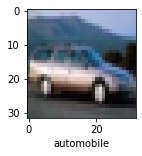

In [ ]:
plot_sample(X_train, y_train, 4)

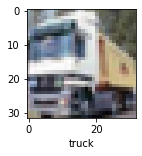

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 173s 110ms/step - loss: 1.8149 - accuracy: 0.3521
Epoch 2/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.6267 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.5453 - accuracy: 0.4560
Epoch 4/5
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4849 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 71s 46ms/step - loss: 1.4325 - accuracy: 0.4958


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 17ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.68      0.55      1000
           1       0.55      0.68      0.61      1000
           2       0.56      0.06      0.11      1000
           3       0.38      0.20      0.26      1000
           4       0.40      0.46      0.43      1000
           5       0.38      0.45      0.41      1000
           6       0.54      0.55      0.55      1000
           7       0.51      0.60      0.55      1000
           8       0.60      0.60      0.60      1000
           9       0.50      0.59      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.46     10000
weighted avg       0.49      0.49      0.46     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.4384 - accuracy: 0.4850
Epoch 2/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.0831 - accuracy: 0.6207
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9537 - accuracy: 0.6666
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8702 - accuracy: 0.6965
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7987 - accuracy: 0.7201
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7389 - accuracy: 0.7435
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6888 - accuracy: 0.7594
Epoch 8/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6358 - accuracy: 0.7770
Epoch 9/10
1563/1563 [==============================] - 45s 28ms/step - loss: 0.5936 - accuracy: 0.7911
Epoch 10/10
1563/1563 [==============================] - 46s 29m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9125 - accuracy: 0.7065


[0.9124581813812256, 0.7064999938011169]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[2.8544720e-03, 5.7536839e-05, 8.2882802e-04, 5.9804380e-01,
        5.0176081e-04, 2.2392331e-01, 1.8186909e-04, 7.5464179e-03,
        1.6597970e-01, 8.2283106e-05],
       [2.0397766e-03, 1.0636373e-02, 1.6788539e-06, 1.8610726e-06,
        7.7043412e-09, 3.8847128e-10, 7.6309203e-10, 1.4978779e-11,
        9.8669058e-01, 6.2977837e-04],
       [1.8744868e-01, 4.3471399e-01, 3.7603013e-03, 2.0239092e-03,
        9.5634292e-05, 1.6063501e-04, 4.7120187e-04, 8.6869282e-04,
        3.3938995e-01, 3.1066932e-02],
       [9.9262762e-01, 5.6368584e-04, 5.5629667e-03, 1.0741648e-04,
        4.9073016e-05, 5.6851252e-07, 2.5551419e-05, 2.8930376e-06,
        1.0345074e-03, 2.5620300e-05],
       [2.4000073e-07, 4.7691742e-06, 2.9382338e-03, 1.6772059e-03,
        9.7179741e-01, 1.3508035e-04, 2.3431778e-02, 1.3066122e-07,
        1.4792293e-05, 4.0285312e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

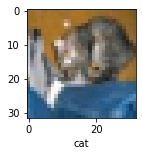

In [ ]:
plot_sample(X_test, y_test,0)

In [ ]:
classes[y_classes[0]]

'cat'